In [ ]:
#532 project

In [ ]:
# Function to load student data from CSV file
import csv
def load_data():
    students = {}
    try:
        with open('grades.csv', mode='r') as file:
            reader = csv.reader(file)
            header = next(reader)  # Read the header row
            subject_names = header[2:]  # Extract subject names from header
            
            for row in reader:
                student_id = row[0]
                student_name = row[1]
                grades = {subject_names[i]: int(row[i + 2]) for i in range(len(subject_names))}
                students[student_id] = {'name': student_name, 'grades': grades}
    except FileNotFoundError:
        # If file doesn't exist, create an empty one
        open('grades.csv', mode='w').close()
    return students

In [ ]:
def save_data(students):
    with open('grades.csv', mode='w', newline='') as file:
        # Extract all subject names
        all_subjects = set()
        for data in students.values():
            all_subjects.update(data['grades'].keys())
        
        # Generate fieldnames dynamically based on all subject names
        fieldnames = ['ID', 'Name'] + list(all_subjects) + ['Average Marks', 'Grade']
        
        writer = csv.DictWriter(file, fieldnames=fieldnames)
        writer.writeheader()
        for id, data in students.items():
            row = {'ID': id, 'Name': data['name']}
            
            # Add grades for each subject
            row.update(data['grades'])
            
            # Calculate average marks and grade
            average_marks = calculate_average_grade(students, id)
            if average_marks is not None:
                average_marks = round(average_marks, 2)
                if average_marks > 90:
                    grade = 'A'
                elif average_marks > 80:
                    grade = 'B'
                elif average_marks > 70:
                    grade = 'C'
                else:
                    grade = 'F'
                row['Average Marks'] = average_marks
                row['Grade'] = grade
            
            writer.writerow(row)


In [ ]:
# Function to add a new student
def add_student(students, student_id, name):
    if student_id not in students:
        num_subjects = int(input("Enter the no. of subjects: "))
        subject_names = [input(f"Enter name of subject-{i}: ") for i in range(1, num_subjects + 1)]
        grades = {}
        for subject_name in subject_names:
            grade = input(f"Enter marks in {subject_name}: ")
            grades[subject_name] = int(grade)
        students[student_id] = {'name': name, 'grades': grades}
        save_data(students)  # Save all data including newly added student
        print("Student added successfully.")
    else:
        print("Student ID already exists. Please choose a different ID.")

In [ ]:
# Function to edit student name
def edit_student_name(students, student_id, new_name):
    if student_id in students:
        students[student_id]['name'] = new_name
        save_data(students)
        print("Student name updated successfully.")
    else:
        print("Student ID not found.")


In [ ]:
# Function to delete a student
def delete_student(students, student_id):
    if student_id in students:
        del students[student_id]
        save_data(students)
        print("Student deleted successfully.")
    else:
        print("Student ID not found.")

In [ ]:
# Function to generate report
def generate_report(students, subject_names):
    max_subjects = len(subject_names)
    
    header = "Student ID  | Name     |"
    for subject_name in subject_names:
        header += f" {subject_name} |"
    header += " Average Marks | Grade"
    
    print(header)
    print("=" * len(header))
    
    for student_id, data in students.items():
        average_marks = calculate_average_grade(students, student_id)
        if average_marks is not None:
            average_marks = round(average_marks, 2)
            if average_marks > 90:
                grade = 'A'
            elif average_marks > 80:
                grade = 'B'
            elif average_marks > 70:
                grade = 'C'
            else:
                grade = 'F'
            
            subject_grades = [str(data['grades'].get(subject_name, '')).ljust(11) for subject_name in subject_names]
            subject_grades.extend([str(average_marks), grade])
            
            print(f"{student_id:<11}| {data['name']:<9}| {'|'.join(subject_grades):<10}| {subject_grades[max_subjects]:<10}| {subject_grades[max_subjects + 1]}")
    
    print("=" * len(header))

In [ ]:
# Function to generate report
def calculate_average_grade(students, student_id):
    if student_id in students:
        grades = students[student_id]['grades']
        if grades:
            total_marks = 0
            num_subjects = 0
            for grade in grades.values():
                try:
                    total_marks += int(grade)
                    num_subjects += 1
                except ValueError:
                    pass  # Skip non-numeric grades
            if num_subjects > 0:
                average_marks = total_marks / num_subjects
                return average_marks
            else:
                return 0
        else:
            return 0
    else:
        return None

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
def visualize_subject_marks(students):
    subject_marks = {}  # Dictionary to store average marks for each subject
    
    # Calculate average marks for each subject
    for student_data in students.values():
        for subject, marks in student_data['grades'].items():
            if subject not in subject_marks:
                subject_marks[subject] = []
            subject_marks[subject].append(marks)
    
    # Calculate average marks for each subject
    subject_avg_marks = {subject: np.mean(marks) for subject, marks in subject_marks.items()}
    
    # Plotting
    plt.figure(figsize=(10, 6))
    subjects = list(subject_avg_marks.keys())
    marks = list(subject_avg_marks.values())
    
    plt.bar(subjects, marks, color='skyblue')
    plt.xlabel('Subjects')
    plt.ylabel('Average Marks')
    plt.title('Average Marks Secured by Students in Each Subject')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_student_marks(students):
    # Collect data for visualization
    student_ids = list(students.keys())
    subject_names = list(students[student_ids[0]]['grades'].keys())
    marks_matrix = np.zeros((len(student_ids), len(subject_names)))
    
    for i, student_id in enumerate(student_ids):
        for j, subject_name in enumerate(subject_names):
            marks_matrix[i, j] = students[student_id]['grades'].get(subject_name, np.nan)
    
    # Create heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(marks_matrix, cmap='viridis', annot=True, fmt=".1f", xticklabels=subject_names, yticklabels=student_ids)
    plt.xlabel('Subjects')
    plt.ylabel('Student IDs')
    plt.title('Student Marks vs Subjects')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [ ]:
pip install numpy

In [ ]:
# Function to get user input
def get_user_input(prompt):
    return input(prompt)


Student added successfully.
1. Add Student
2. Edit Student Name
3. Delete Student
4. Generate Report
5.Visualisation(Subjects vs Average Scores)
6.Visualisation(Student Marks vs Subjects)
7. Exit
Student added successfully.
1. Add Student
2. Edit Student Name
3. Delete Student
4. Generate Report
5.Visualisation(Subjects vs Average Scores)
6.Visualisation(Student Marks vs Subjects)
7. Exit
Student added successfully.
1. Add Student
2. Edit Student Name
3. Delete Student
4. Generate Report
5.Visualisation(Subjects vs Average Scores)
6.Visualisation(Student Marks vs Subjects)
7. Exit
Student ID  | Name     | c | python | r | java | Average Marks | Grade
5          | deepka   | 67         |89         |90         |89         |83.75|B| 83.75     | B
2          | ravi     | 78         |90         |89         |67         |81.0|B| 81.0      | B
3          | chai     | 78         |94         |96         |90         |89.5|B| 89.5      | B
1. Add Student
2. Edit Student Name
3. Delete Student
4. G

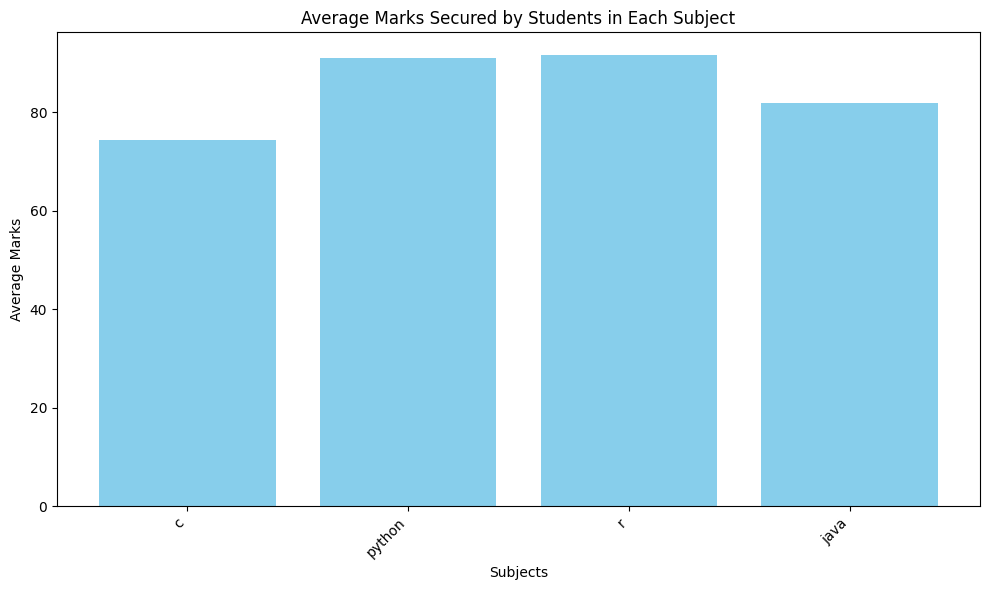

1. Add Student
2. Edit Student Name
3. Delete Student
4. Generate Report
5.Visualisation(Subjects vs Average Scores)
6.Visualisation(Student Marks vs Subjects)
7. Exit
Student ID  | Name     | c | python | r | java | Average Marks | Grade
5          | deepka   | 67         |89         |90         |89         |83.75|B| 83.75     | B
2          | ravi     | 78         |90         |89         |67         |81.0|B| 81.0      | B
3          | chai     | 78         |94         |96         |90         |89.5|B| 89.5      | B


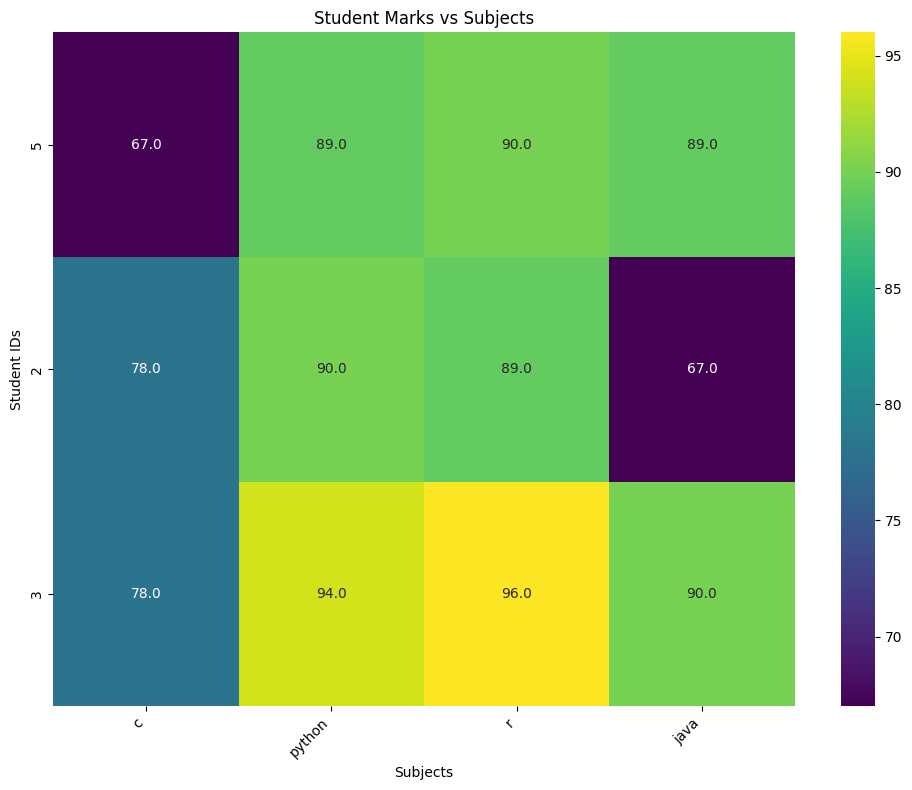

1. Add Student
2. Edit Student Name
3. Delete Student
4. Generate Report
5.Visualisation(Subjects vs Average Scores)
6.Visualisation(Student Marks vs Subjects)
7. Exit


In [26]:
# Main program
students = load_data()

while True:
    print("1. Add Student")
    print("2. Edit Student Name")
    print("3. Delete Student")
    print("4. Generate Report")
    print("5.Visualisation(Subjects vs Average Scores)")
    print("6.Visualisation(Student Marks vs Subjects)")
    print("7. Exit")

    choice = get_user_input("Enter your choice: ")

    if choice == '1':
        student_id = get_user_input("Enter student ID: ")
        name = get_user_input("Enter student name: ")
        add_student(students, student_id, name)
    elif choice == '2':
        student_id = get_user_input("Enter student ID: ")
        new_name = get_user_input("Enter new name: ")
        edit_student_name(students, student_id, new_name)
    elif choice == '3':
        student_id = get_user_input("Enter student ID: ")
        delete_student(students, student_id)
    elif choice == '4':
        # Get subject names from the first student
        subject_names = list(students[next(iter(students))]['grades'].keys())
        generate_report(students, subject_names)
    elif choice == '5':
        subject_names = list(students[next(iter(students))]['grades'].keys())
        generate_report(students, subject_names)
        visualize_subject_marks(students)
    elif choice == '6':
        subject_names = list(students[next(iter(students))]['grades'].keys())
        generate_report(students, subject_names)
        visualize_student_marks(students)
    elif choice == '7':
        break
    else:
        print("Invalid choice. Please try again.")